In [77]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/36/7b/8c5dfc64a8344ebf2ae493d59af4b3650588051f654e164ff4f9952877b3/scikit_learn-1.6.0-cp310-cp310-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/07/42/0e0bea9666fcbf2cb6ea0205db42c81b1f34d7b729ba251010edf9c80ebd/scipy-1.14.1-cp310-cp310-macosx_14_0_arm64.whl.metadata
  Using cached scipy-1.14.1-cp310-cp310-macosx_14_0_arm64.whl.metadata (60 kB)
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
new_candiate=pd.read_csv('new_candidate_data.csv')

new_employee=pd.read_csv('new_employee_data.csv')
display(new_candiate)
display(new_employee)

,CandidateID,AssociateID,AssessmentDate,TimeTaken_OldAssessment,TimeTaken_NewAssessment,OldAssessment_Section1,OldAssessment_Section2,OldAssessment_Section3,NewAssessment_Section1,NewAssessment_Section2,NewAssessment_Section3,NewAssessment_Section4
0,1,1001,2022-01-01,31.23,84.90,89.45,84.66,91.00,64.71,77.61,79.63,83.90
1,2,1002,2022-01-02,16.56,101.29,60.15,74.42,72.52,73.61,80.60,71.89,96.42
2,3,1003,2022-01-03,30.65,77.67,95.62,76.51,77.41,61.53,73.18,86.66,86.30
3,4,1004,2022-01-04,32.64,68.88,97.58,69.21,87.78,89.58,98.67,46.98,97.91
4,5,1005,2022-01-05,32.18,68.82,79.26,72.84,92.14,90.23,99.58,55.64,91.58
...,...,...,...,...,...,...,...,...,...,...,...,...
1005,827,1827,2024-04-06,33.09,69.01,51.22,83.07,87.04,47.80,98.26,78.03,88.09
1006,735,1735,2024-01-05,31.34,88.10,54.01,73.12,82.32,46.99,98.49,46.05,83.57
1007,860,1860,2024-05-09,21.80,75.60,89.36,71.19,78.96,79.42,73.88,81.45,99.51
1008,188,1188,2022-07-07,19.19,63.59,59.54,83.82,86.07,80.69,94.69,78.46,97.64


,AssociateID,HireDate,TerminationDate,PerformanceDate,PerformanceRating
0,1001,2022-11-04,2023-06-09,2022-11-30,3.99
1,1001,2022-11-04,2023-06-09,2023-05-31,4.26
2,1003,2022-09-20,2024-03-09,2022-09-30,3.89
3,1003,2022-09-20,2024-03-09,2023-03-31,4.24
4,1003,2022-09-20,2024-03-09,2023-09-30,3.81
...,...,...,...,...,...
1704,1196,2022-03-25,2024-03-15,2022-03-31,3.86
1705,1944,2022-11-09,2024-06-03,2024-05-31,3.78
1706,1901,2022-08-23,2023-07-17,2022-08-31,3.35
1707,1582,2022-01-25,2023-08-15,2022-01-31,4.05


In [108]:

new_employee['AveragePerformance'] = new_employee.groupby('AssociateID')['PerformanceRating'].transform('mean')
#  datetime format
new_employee['HireDate'] = pd.to_datetime(new_employee['HireDate'])
new_employee['TerminationDate'] = pd.to_datetime(new_employee['TerminationDate'])


new_employee['days_employed'] = (new_employee['TerminationDate'] - new_employee['HireDate']).dt.days
new_employee.drop(['PerformanceDate','HireDate','TerminationDate','PerformanceRating'], axis=1, inplace=True)
new_employee=new_employee.drop_duplicates()
new_employee

,AssociateID,AveragePerformance,days_employed
0,1001,4.125000,217.0
2,1003,3.980000,536.0
5,1007,3.980000,185.0
6,1010,4.480000,522.0
9,1011,4.326667,446.0
...,...,...,...
1680,1995,4.030000,342.0
1682,1996,4.113333,479.0
1685,1997,4.110000,281.0
1687,1998,4.170000,344.0


In [109]:
merge_new_employee_new_candidate = pd.merge(new_employee,new_candiate,on="AssociateID",how="inner")
merge_new_employee_new_candidate

,AssociateID,AveragePerformance,days_employed,CandidateID,AssessmentDate,TimeTaken_OldAssessment,TimeTaken_NewAssessment,OldAssessment_Section1,OldAssessment_Section2,OldAssessment_Section3,NewAssessment_Section1,NewAssessment_Section2,NewAssessment_Section3,NewAssessment_Section4
0,1001,4.125000,217.0,1,2022-01-01,31.23,84.90,89.45,84.66,91.00,64.71,77.61,79.63,83.90
1,1003,3.980000,536.0,3,2022-01-03,30.65,77.67,95.62,76.51,77.41,61.53,73.18,86.66,86.30
2,1007,3.980000,185.0,7,2022-01-07,23.57,86.13,51.68,92.72,78.40,47.22,80.49,49.49,97.60
3,1010,4.480000,522.0,10,2022-01-10,23.67,76.64,94.39,83.64,89.00,49.62,96.44,57.51,96.79
4,1011,4.326667,446.0,11,2022-01-11,25.12,82.72,90.61,71.25,92.92,93.79,88.86,60.94,88.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,1995,4.030000,342.0,995,2024-09-21,33.62,81.29,68.10,64.43,87.92,56.26,75.03,75.23,97.95
662,1996,4.113333,479.0,996,2024-09-22,33.24,79.88,68.10,84.90,89.09,56.61,73.16,74.54,97.33
663,1997,4.110000,281.0,997,2024-09-23,33.24,89.14,98.99,79.53,94.87,62.09,82.39,70.73,79.52
664,1998,4.170000,344.0,998,2024-09-24,25.90,90.86,68.76,80.94,83.30,41.59,70.54,47.12,91.05


In [118]:
merge_new_employee_new_candidate["OldAssessmentScore"] = merge_new_employee_new_candidate.apply(
    lambda row: row["OldAssessment_Section1"] + row["OldAssessment_Section2"]+ row["OldAssessment_Section3"], axis=1
)
merge_new_employee_new_candidate["NewAssessmentScore"] = merge_new_employee_new_candidate.apply(
    lambda row: row["NewAssessment_Section1"] + row["NewAssessment_Section2"]+ row["NewAssessment_Section3"]+ row["NewAssessment_Section4"], axis=1
)
merge_new_employee_new_candidate["finalAssessmentScore"] = merge_new_employee_new_candidate.apply(
    lambda row: (row["NewAssessmentScore"] + row["OldAssessmentScore"])/2, axis=1
)
merge_new_employee_new_candidate["Majorimpactsections"] = merge_new_employee_new_candidate.apply(
    lambda row: (row["OldAssessment_Section2"] + row["NewAssessment_Section2"]+ row["NewAssessment_Section4"]), axis=1
)

In [119]:
merge_new_employee_new_candidate

,AssociateID,AveragePerformance,days_employed,CandidateID,AssessmentDate,TimeTaken_OldAssessment,TimeTaken_NewAssessment,OldAssessment_Section1,OldAssessment_Section2,OldAssessment_Section3,NewAssessment_Section1,NewAssessment_Section2,NewAssessment_Section3,NewAssessment_Section4,OldAssessmentScore,NewAssessmentScore,finalAssessmentScore,,Majorimpactsections
0,1001,4.125000,217.0,1,2022-01-01,31.23,84.90,89.45,84.66,91.00,64.71,77.61,79.63,83.90,265.11,305.85,285.480,246.17,246.17
1,1003,3.980000,536.0,3,2022-01-03,30.65,77.67,95.62,76.51,77.41,61.53,73.18,86.66,86.30,249.54,307.67,278.605,235.99,235.99
2,1007,3.980000,185.0,7,2022-01-07,23.57,86.13,51.68,92.72,78.40,47.22,80.49,49.49,97.60,222.80,274.80,248.800,270.81,270.81
3,1010,4.480000,522.0,10,2022-01-10,23.67,76.64,94.39,83.64,89.00,49.62,96.44,57.51,96.79,267.03,300.36,283.695,276.87,276.87
4,1011,4.326667,446.0,11,2022-01-11,25.12,82.72,90.61,71.25,92.92,93.79,88.86,60.94,88.85,254.78,332.44,293.610,248.96,248.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,1995,4.030000,342.0,995,2024-09-21,33.62,81.29,68.10,64.43,87.92,56.26,75.03,75.23,97.95,220.45,304.47,262.460,237.41,237.41
662,1996,4.113333,479.0,996,2024-09-22,33.24,79.88,68.10,84.90,89.09,56.61,73.16,74.54,97.33,242.09,301.64,271.865,255.39,255.39
663,1997,4.110000,281.0,997,2024-09-23,33.24,89.14,98.99,79.53,94.87,62.09,82.39,70.73,79.52,273.39,294.73,284.060,241.44,241.44
664,1998,4.170000,344.0,998,2024-09-24,25.90,90.86,68.76,80.94,83.30,41.59,70.54,47.12,91.05,233.00,250.30,241.650,242.53,242.53


In [120]:
merge_new_employee_new_candidate.describe()


,AssociateID,AveragePerformance,days_employed,CandidateID,TimeTaken_OldAssessment,TimeTaken_NewAssessment,OldAssessment_Section1,OldAssessment_Section2,OldAssessment_Section3,NewAssessment_Section1,NewAssessment_Section2,NewAssessment_Section3,NewAssessment_Section4,OldAssessmentScore,NewAssessmentScore,finalAssessmentScore,,Majorimpactsections
count,591.000000,591.000000,514.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000
mean,1494.793570,4.201399,456.142023,494.793570,30.293503,80.581015,74.622149,79.961574,82.747919,67.379205,84.721861,66.286616,86.786227,237.331641,305.173909,271.252775,251.469662,251.469662
std,287.524928,0.286334,155.858389,287.524928,4.895486,9.870403,14.796249,11.507864,7.303744,15.973550,8.511492,14.765585,7.372683,19.206287,24.578476,16.053845,16.712227,16.712227
min,1001.000000,3.453333,183.000000,1.000000,14.410000,53.180000,50.080000,60.030000,70.020000,40.120000,70.010000,40.210000,75.030000,189.790000,243.760000,228.160000,209.630000,209.630000
25%,1246.000000,3.995833,324.000000,246.000000,27.130000,73.970000,61.325000,69.750000,76.455000,53.675000,77.610000,52.980000,80.295000,223.230000,287.545000,260.330000,238.965000,238.965000
50%,1486.000000,4.187500,457.000000,486.000000,30.300000,80.430000,74.650000,80.060000,82.950000,66.720000,84.690000,67.480000,86.850000,236.740000,304.950000,270.670000,251.350000,251.350000
75%,1753.000000,4.411250,588.750000,753.000000,33.825000,87.585000,87.825000,90.310000,89.070000,81.850000,91.665000,80.180000,93.050000,249.980000,322.560000,282.860000,263.340000,263.340000
max,1999.000000,4.960000,728.000000,999.000000,44.980000,109.700000,99.880000,99.980000,94.980000,94.910000,99.960000,89.960000,100.000000,289.460000,365.580000,315.230000,293.370000,293.370000


In [121]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [129]:
columns_to_check = ['OldAssessment_Section1','OldAssessment_Section2','OldAssessment_Section3','finalAssessmentScore','OldAssessmentScore', "NewAssessment_Section1","NewAssessment_Section2","NewAssessment_Section3","NewAssessment_Section4",'NewAssessmentScore', 'Majorimpactsections','AveragePerformance']


for col in columns_to_check:
    merge_new_employee_new_candidate = remove_outliers_iqr(merge_new_employee_new_candidate, col)

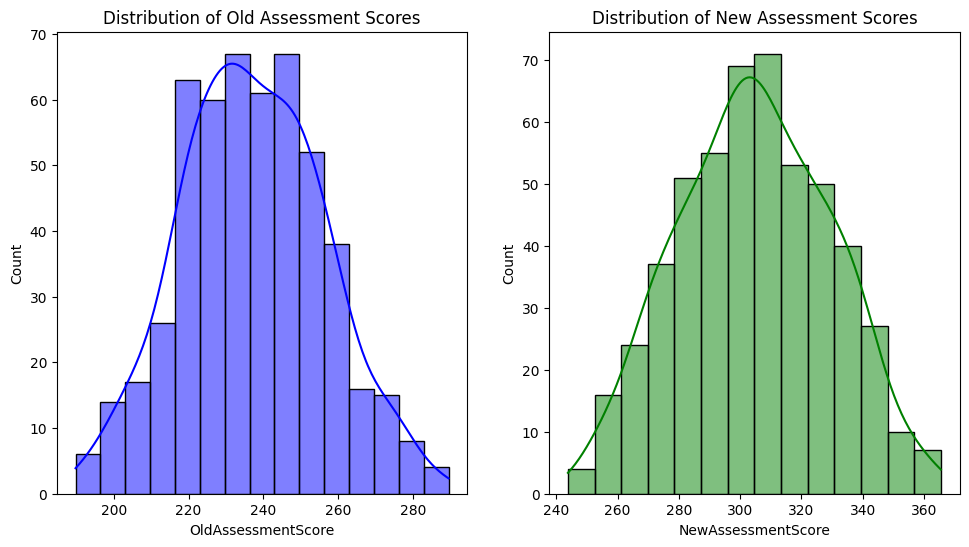

In [130]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(merge_new_employee_new_candidate['OldAssessmentScore'], kde=True, color='blue')
plt.title('Distribution of Old Assessment Scores')

plt.subplot(1, 3, 2)
sns.histplot(merge_new_employee_new_candidate['NewAssessmentScore'], kde=True, color='green')
plt.title('Distribution of New Assessment Scores')
plt.show()

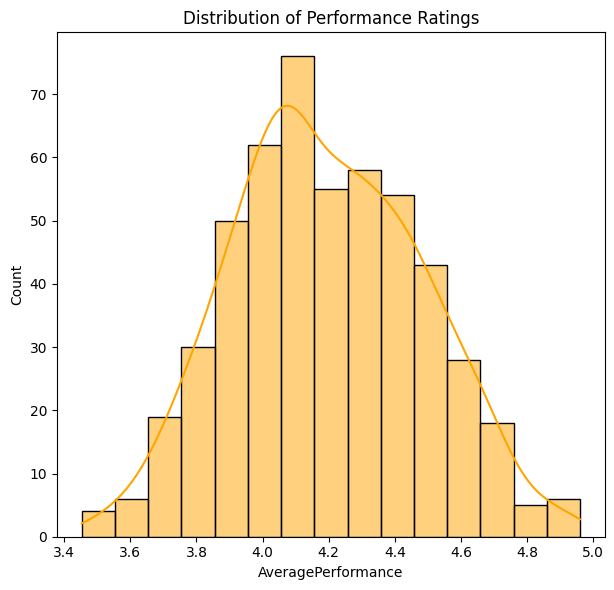

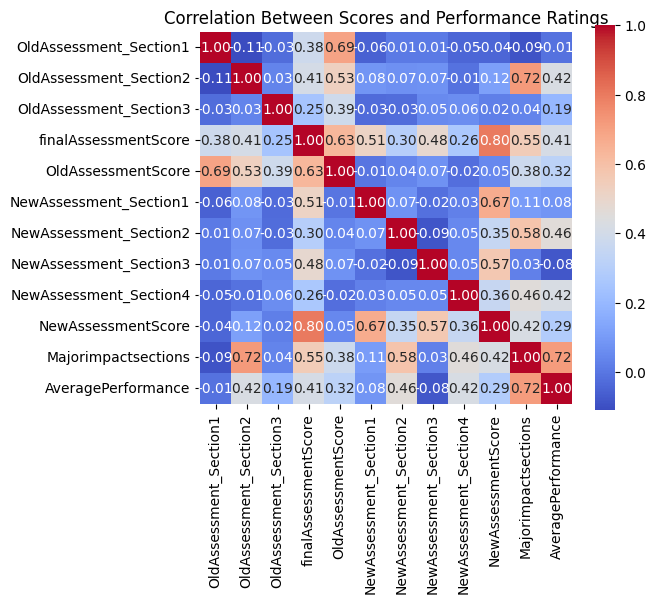

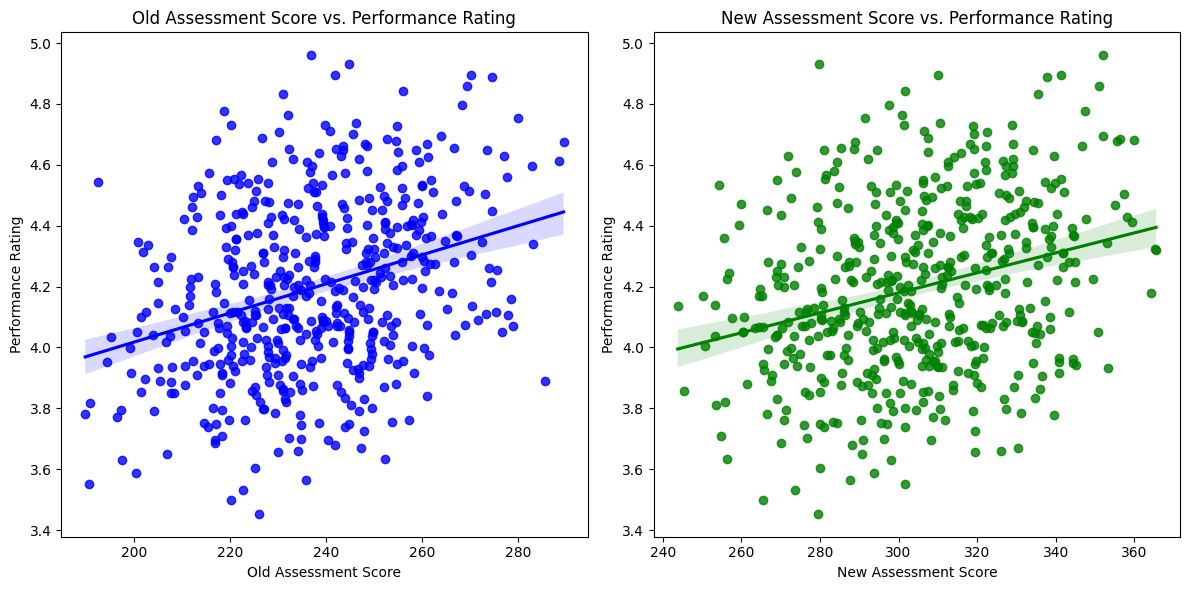

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Visualize Distributions of Scores, Completion Times, and Performance Ratings
plt.figure(figsize=(18, 6))


plt.subplot(1, 3, 3)
sns.histplot(merge_new_employee_new_candidate['AveragePerformance'], kde=True, color='orange')
plt.title('Distribution of Performance Ratings')

plt.tight_layout()
plt.show()

# 3. Check Correlations Between Scores and Performance Ratings
correlation_matrix = merge_new_employee_new_candidate[['OldAssessment_Section1','OldAssessment_Section2','OldAssessment_Section3','finalAssessmentScore','OldAssessmentScore', "NewAssessment_Section1","NewAssessment_Section2","NewAssessment_Section3","NewAssessment_Section4",'NewAssessmentScore', 'Majorimpactsections','AveragePerformance']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Between Scores and Performance Ratings')
plt.show()

# 4. Assess Predictive Patterns Between Old and New Assessments
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.regplot(x='OldAssessmentScore', y='AveragePerformance', data=merge_new_employee_new_candidate, color='blue')
plt.title('Old Assessment Score vs. Performance Rating')
plt.xlabel('Old Assessment Score')
plt.ylabel('Performance Rating')

plt.subplot(1, 2, 2)
sns.regplot(x='NewAssessmentScore', y='AveragePerformance', data=merge_new_employee_new_candidate, color='green')
plt.title('New Assessment Score vs. Performance Rating')
plt.xlabel('New Assessment Score')
plt.ylabel('Performance Rating')

plt.tight_layout()
plt.show()


In [132]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt

In [125]:

X = merge_new_employee_new_candidate[['Majorimpactsections']]  # Predictor variable
y = merge_new_employee_new_candidate['AveragePerformance']       # Target variable

# Split the dataset into training and testing sets (80%-20% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("R-squared:", r2)
print("mae:", mae)




Root Mean Squared Error (RMSE): 0.21102093696331636
R-squared: 0.5613877656874691
mae: 0.17565240222734443


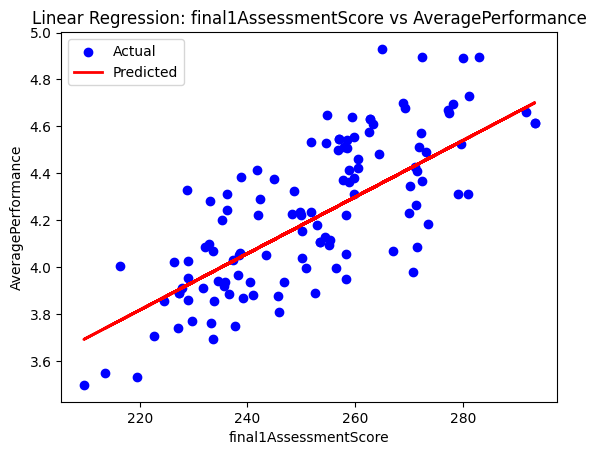

In [88]:
# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel('Majorimpactsections')
plt.ylabel('AveragePerformance')
plt.title('Linear Regression: Majorimpactsections vs AveragePerformance')
plt.legend()
plt.show()

Model Evaluation:
Root Mean Squared Error (RMSE): 0.20184406061379234
Mean Absolute Error (MAE): 0.16862649904780022
R² Score: 0.5987069886493175


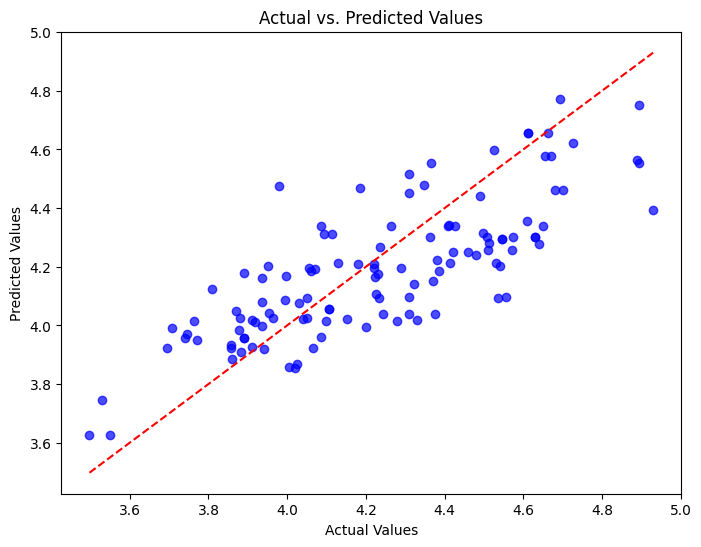

In [98]:
from xgboost import XGBRegressor

X = merge_new_employee_new_candidate[['Majorimpactsections']] 
y = merge_new_employee_new_candidate['AveragePerformance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = XGBRegressor(
    n_estimators=100,          
    learning_rate=0.1,         
    max_depth=5,              
    subsample=0.8,             
    colsample_bytree=0.8,      
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()



In [103]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Model 1: Old Assessment
X_old = merge_new_employee_new_candidate[['OldAssessmentScore', 'OldAssessment_Section1', 'OldAssessment_Section2']]
y = merge_new_employee_new_candidate['AveragePerformance']
X_train_old, X_test_old, y_train, y_test = train_test_split(X_old, y, test_size=0.2, random_state=42)

model_old = XGBRegressor()
model_old.fit(X_train_old, y_train)
y_pred_old = model_old.predict(X_test_old)

rmse_old = mean_squared_error(y_test, y_pred_old, )
r2_old = r2_score(y_test, y_pred_old)

# Model 2: New Assessment
X_new = merge_new_employee_new_candidate[['NewAssessmentScore', 'NewAssessment_Section1', 'NewAssessment_Section2','NewAssessment_Section3','NewAssessment_Section4',]]
X_train_new, X_test_new, _, _ = train_test_split(X_new, y, test_size=0.2, random_state=42)

model_new = XGBRegressor()
model_new.fit(X_train_new, y_train)
y_pred_new = model_new.predict(X_test_new)

rmse_new = mean_squared_error(y_test, y_pred_new)
r2_new = r2_score(y_test, y_pred_new)

print(f"Old Assessment RMSE: {rmse_old}, R2: {r2_old}")
print(f"New Assessment RMSE: {rmse_new}, R2: {r2_new}")


Old Assessment RMSE: 0.09669487184174783, R2: 0.04756994972006856
New Assessment RMSE: 0.06694297420017574, R2: 0.3406216992798793
